###  Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


%matplotlib inline


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn.

Note: you may need to restart the kernel to use updated packages.


### Import the CSV Data as pandas DataFrame

In [34]:
df = pd.read_csv(r'google_outliers.csv')

In [35]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [24]:
df.shape

(10839, 17)

### Show Top 5 Records

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,7,1,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,15,1,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7,1,8,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,136553.0,25000.0,12498500.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0,8,6,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8,20,6,2018.0


### Dropping columns that do not contribute numerically to the Regression Model

In [36]:
df.drop(columns = ['Current Ver', 'Android Ver', 'App', 'Last Updated'], inplace = True)  

### Encoding Categorical values

(one-hot encoding)

In [37]:
df = pd.get_dummies(df,columns = ['Type','Content Rating'], drop_first=True)  

In [38]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,Genres,size,day,month,year,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,0.0,Art & Design,19.0,7,1,2018.0,0,1,0,0,0,0
1,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,0.0,Art & Design;Pretend Play,14.0,15,1,2018.0,0,1,0,0,0,0
2,ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,0.0,Art & Design,8.7,1,8,2018.0,0,1,0,0,0,0
3,ART_AND_DESIGN,4.5,136553.0,25000.0,12498500.0,0.0,Art & Design,25.0,8,6,2018.0,0,0,0,0,1,0
4,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,0.0,Art & Design;Creativity,2.8,20,6,2018.0,0,1,0,0,0,0


### Spliting our mathematical feature columns and assigning it to 'X'

In [42]:
x = df.drop(columns = ['Category', 'Rating','Genres', 'Size', 'day','month', 'year'], axis=1)

In [43]:
x.head()

,Reviews,Installs,Price,size,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159.0,10000.0,0.0,19.0,0,1,0,0,0,0
1,967.0,500000.0,0.0,14.0,0,1,0,0,0,0
2,87510.0,5000000.0,0.0,8.7,0,1,0,0,0,0
3,136553.0,12498500.0,0.0,25.0,0,0,0,0,1,0
4,967.0,100000.0,0.0,2.8,0,1,0,0,0,0


### Splitting our target variable 'Rating' and assigning it to 'y'

In [44]:
y = df['Rating']

### Splitting up our data set into 'train' and 'test'

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3 )

### Scaling the training data(fitting the parameters and transforming the values)

In [46]:
scaler =StandardScaler()

x_train = scaler.fit_transform(x_train)

# transforming the test data. we avoid fitting the values to prevent data leakage

x_test = scaler.transform(x_test)

In [47]:
x_train

array([[ 1.91245368,  1.70568271, -0.06584162, ..., -0.22057285,
        -0.35426073, -0.01623817],
       [ 0.37006996,  2.28552166, -0.06584162, ..., -0.22057285,
        -0.35426073, -0.01623817],
       [ 1.91245368,  2.28552166, -0.06584162, ..., -0.22057285,
        -0.35426073, -0.01623817],
       ...,
       [-0.66336826, -0.61483345, -0.06584162, ..., -0.22057285,
        -0.35426073, -0.01623817],
       [-0.58325472, -0.59185804, -0.06584162, ..., -0.22057285,
        -0.35426073, -0.01623817],
       [ 1.766321  ,  1.70568271, -0.06584162, ..., -0.22057285,
        -0.35426073, -0.01623817]])

In [48]:
x_test

array([[-0.663406  , -0.61390515, -0.06584162, ..., -0.22057285,
        -0.35426073, -0.01623817],
       [ 1.91245368,  1.70568271, -0.06584162, ..., -0.22057285,
         2.82277968, -0.01623817],
       [ 1.91245368,  2.28552166, -0.06584162, ..., -0.22057285,
         2.82277968, -0.01623817],
       ...,
       [-0.66402864, -0.61506436, -0.06584162, ..., -0.22057285,
        -0.35426073, -0.01623817],
       [ 0.09282354,  0.5453086 , -0.06584162, ..., -0.22057285,
        -0.35426073, -0.01623817],
       [-0.51034876, -0.49902811, -0.06584162, ..., -0.22057285,
        -0.35426073, -0.01623817]])

### Model Training

In [49]:
regression = LinearRegression()  # when we do this it takes all the default values into it 

In [50]:
regression # LinearRegression() is a object

LinearRegression()

In [51]:
regression.fit(x_train, y_train)

LinearRegression()

In [52]:
## print the coefficients and the intercept

print(regression.coef_)

[ 0.1772959  -0.09628058 -0.01377866 -0.00036832  0.03160835  0.00250993
 -0.00441522 -0.01758688 -0.001768   -0.00787861]


In [53]:
print(regression.intercept_)

4.224891261368129


In [54]:
## prediction for the test data

reg_pred = regression.predict(x_test)

In [55]:
reg_pred

array([4.16525671, 4.38583051, 4.32963938, ..., 4.16516348, 4.1871011 ,
       4.18093269])

### Assumption of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

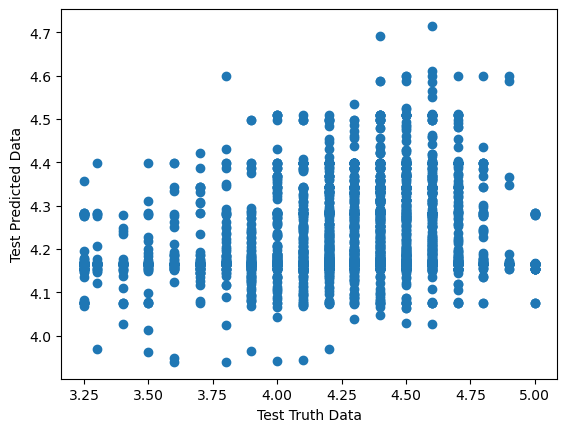

In [57]:
plt.scatter(y_test, reg_pred) # we are checking relationship b/w true value and predicted value. if we get linear relationship then our model is working good
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [58]:
## residuals

residuals = y_test-reg_pred

In [59]:
residuals

6362    0.634743
146     0.114169
1978    0.270361
2094    0.323964
8180   -0.397956
          ...   
8551   -0.753371
5744    0.035037
8605   -0.165163
1005   -0.187101
36      0.519067
Name: Rating, Length: 3252, dtype: float64

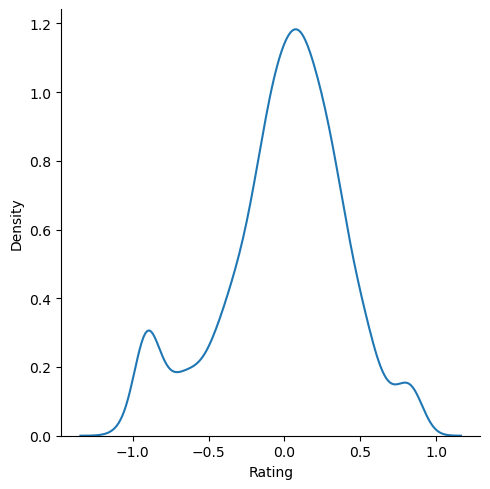

In [60]:
sns.displot(residuals, kind = 'kde') # if we get normally distributed curve, our model is good, we have left skew

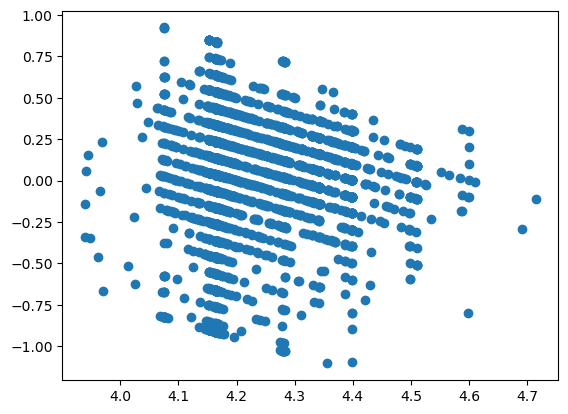

In [61]:
## sctter plot with prediction and residual
# uniforma distribution

plt.scatter(reg_pred, residuals) # no shape, no linearity, model is good

In [62]:
## performance metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

0.1614813840024725
0.3090483775269008
0.40184746360089485


#### R square and Adjusted R square

In [63]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.05830156833389022


In [65]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.0553959884768519

## Ridge

In [67]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [68]:
ridge.fit(x_train,y_train)

Ridge()

In [69]:
ridge.coef_

array([ 0.17708128, -0.09607634, -0.01377629, -0.0003602 ,  0.03160402,
        0.00321653, -0.00406988, -0.01720555, -0.00120019, -0.00784876])

In [70]:
ridge.intercept_

4.224891261368129

In [71]:
pred_rid = ridge.predict(x_test)

In [72]:
pred_rid

array([4.16526229, 4.38579954, 4.32973486, ..., 4.16517103, 4.18719484,
       4.1809377 ])

### Assignment of linear regression

Text(0, 0.5, 'predicted Ridge')

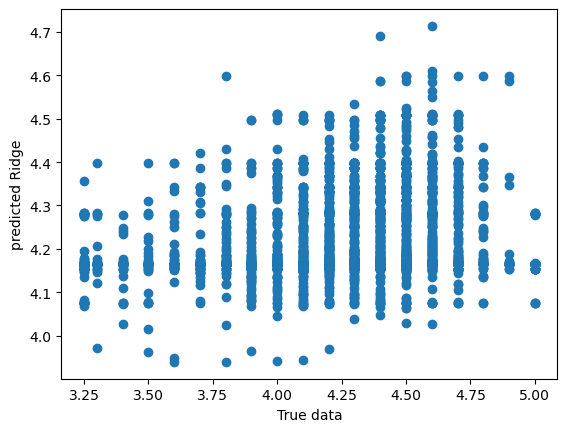

In [73]:
plt.scatter(y_test, pred_rid)
plt.xlabel('True data')
plt.ylabel("predicted Ridge")

In [74]:
residuals_rid = y_test - pred_rid

In [75]:
residuals_rid

6362    0.634738
146     0.114200
1978    0.270265
2094    0.323956
8180   -0.397897
          ...   
8551   -0.753402
5744    0.035030
8605   -0.165171
1005   -0.187195
36      0.519062
Name: Rating, Length: 3252, dtype: float64

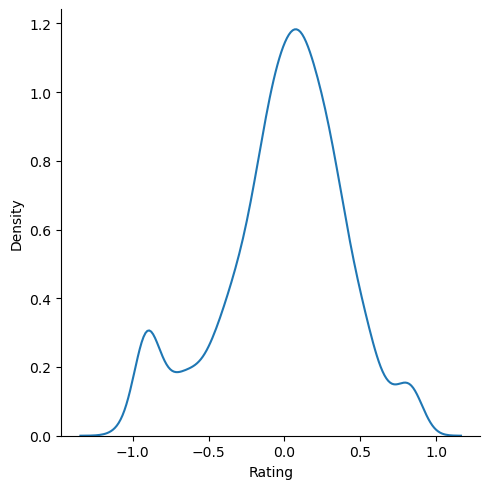

In [76]:
sns.displot(residuals_rid, kind= 'kde')

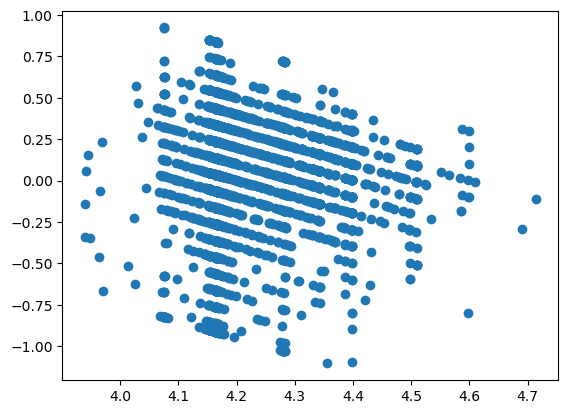

In [79]:
plt.scatter(pred_rid, residuals_rid)

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, pred_rid))
print(mean_absolute_error(y_test, pred_rid))
print(np.sqrt(mean_squared_error(y_test, pred_rid)))

0.16148135205633882
0.3090490359975451
0.4018474238518132


#### R2 and adjusted R2

In [82]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred_rid)
print(score)

0.058301754631674196


In [83]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.055396175349451626

## Lasso

In [84]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [85]:
lasso.fit(x_train, y_train)

Lasso()

In [86]:
lasso.coef_

array([ 0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.])

In [87]:
lasso.intercept_

4.224891261368129

In [88]:
pred_las = lasso.predict(x_test)

In [89]:
pred_las

array([4.22489126, 4.22489126, 4.22489126, ..., 4.22489126, 4.22489126,
       4.22489126])

#### Assumption of linear regression

Text(0, 0.5, 'predicted value')

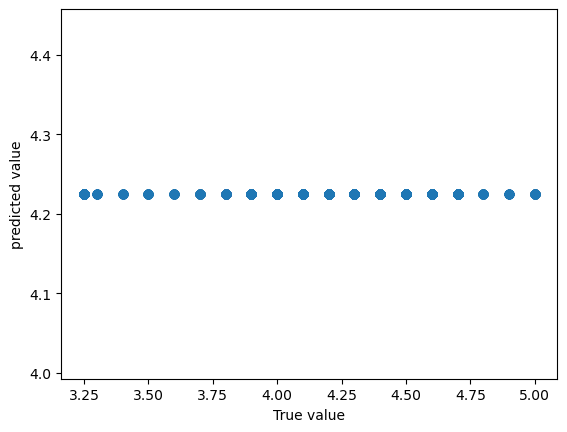

In [90]:
plt.scatter(y_test, pred_las)
plt.xlabel("True value")
plt.ylabel("predicted value")

In [91]:
residuals_las = y_test - pred_las

In [93]:
residuals_las

6362    0.575109
146     0.275109
1978    0.375109
2094    0.275109
8180   -0.224891
          ...   
8551   -0.824891
5744   -0.024891
8605   -0.224891
1005   -0.224891
36      0.475109
Name: Rating, Length: 3252, dtype: float64

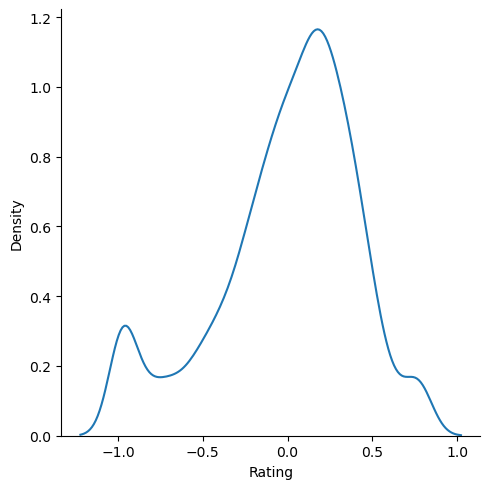

In [94]:
sns.displot(residuals_las, kind = 'kde')

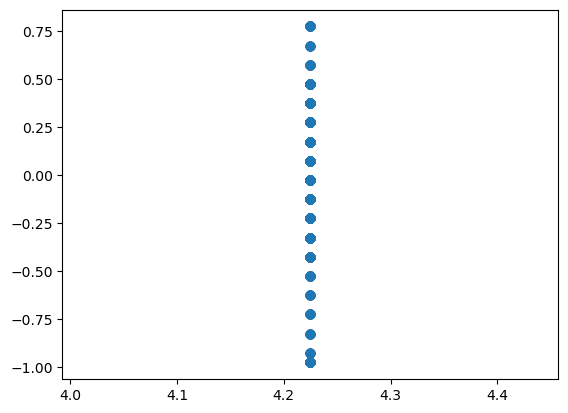

In [95]:
plt.scatter(pred_las, residuals_las)

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absoulte_error

print(mean_squared_error(y_test, pred_las))
print(mean_absolute_error(y_test, pred_las))
print(np.sqrt(mean_squared_error(y_test, pred_las)))

ImportError: cannot import name 'mean_absoulte_error' from 'sklearn.metrics' (C:\Users\Sampath Kumar\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [97]:
# r2 and adjusted r2

In [98]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred_las)
print(score)

-0.00014287125151835056


In [99]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-0.003228779524432568